In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle EEG Time Series Data
#
##########################################################################################

In [1]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a prefix:  
#       First_Last_BIOS6644_EEG.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub push to your branch
#
##################################################################################################################


## Get Data 


Begleiter,Henri. (1999). EEG Database. UCI Machine Learning Repository. 
https://doi.org/10.24432/C5


Data Description: https://archive.ics.uci.edu/ml/datasets/EEG+Database

Data Set:         https://archive.ics.uci.edu/static/public/121/eeg+database.zip


In [12]:
##################################################################################################################
#
# YouDo:
#
#  From the above link, download the file: eeg+database.zip
# Move it to a convenient folder and unzip it.
#
#  From inside the archive, find the file SMNI_CMI_TRAIN.tar.gz.
#  Unzip it and extract the files to a useful location and set
#  the variables "filesloc" to point to it.

# I extracted both files in place and put theim in a folder called Data, under the folder
# containing this notebook.

#  filesloc = './Data/eeg+database/SMNI_CMI_TRAIN/'
    
    
filesloc = './Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/'

In [13]:
# Ensure filesloc points to the expected place
os.listdir(filesloc)

['co2a0000364',
 'co2a0000365',
 'co2a0000368',
 'co2a0000369',
 'co2a0000370',
 'co2a0000371',
 'co2a0000372',
 'co2a0000375',
 'co2a0000377',
 'co2a0000378',
 'co2c0000337',
 'co2c0000338',
 'co2c0000339',
 'co2c0000340',
 'co2c0000341',
 'co2c0000342',
 'co2c0000344',
 'co2c0000345',
 'co2c0000346',
 'co2c0000347',
 'README']

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib notebook

# Some useful extras
import os
import gzip
import datetime as dt



In [21]:
# Notice that the subfolders have gzip files inside them ,too.  Ug.
!ls ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364

co2a0000364.rd.000.gz  co2a0000364.rd.019.gz  co2a0000364.rd.039.gz
co2a0000364.rd.002.gz  co2a0000364.rd.020.gz  co2a0000364.rd.041.gz
co2a0000364.rd.007.gz  co2a0000364.rd.022.gz  co2a0000364.rd.043.gz
co2a0000364.rd.009.gz  co2a0000364.rd.023.gz  co2a0000364.rd.045.gz
co2a0000364.rd.010.gz  co2a0000364.rd.024.gz  co2a0000364.rd.047.gz
co2a0000364.rd.012.gz  co2a0000364.rd.025.gz  co2a0000364.rd.049.gz
co2a0000364.rd.014.gz  co2a0000364.rd.027.gz  co2a0000364.rd.055.gz
co2a0000364.rd.015.gz  co2a0000364.rd.028.gz  co2a0000364.rd.057.gz
co2a0000364.rd.017.gz  co2a0000364.rd.031.gz  co2a0000364.rd.059.gz
co2a0000364.rd.018.gz  co2a0000364.rd.037.gz  co2a0000364.rd.061.gz


## File roundup

The following snippet of code uses the os.walk command to find all files in your filesloc folder.   It then calls the unzip function to unzip anything that needs unzipping

In [22]:
# Adapted from https://www.tutorialspoint.com/python/os_walk.htm
# & http://xahlee.info/python/gzip.html

def unzip(filename):
    import gzip
    print('Unzipping {}'.format(filename))
    input = gzip.GzipFile(filename, 'rb')
    s = input.read()
    input.close()

    output = open(filename.split('.gz')[0], 'wb')
    output.write(s)
    output.close()

# Finda all the gzipped files and unzip them
tic = dt.datetime.now()

for root, dirs, files in os.walk(filesloc, topdown=False):
    for name in files:
        thispath = os.path.join(root, name)
        if thispath.endswith('.gz'):
            unzip(thispath)

toc = dt.datetime.now()
print('{} seconds to unzip'.format(toc-tic))

Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.000.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.002.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.007.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.009.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.010.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.012.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.014.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.015.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.017.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000364/co2a0000364.rd.018.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/

Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.011.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.012.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.013.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.014.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.015.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.016.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.017.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.018.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.019.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000369/co2a0000369.rd.021.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/

Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.011.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.012.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.013.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.014.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.015.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.016.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.017.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.018.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.019.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.021.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/

Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.013.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.014.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.015.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.016.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.017.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.018.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.019.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.021.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.023.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2a0000378/co2a0000378.rd.025.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/

Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.033.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.034.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.035.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.036.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.037.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.039.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.041.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.043.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.047.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000339/co2c0000339.rd.049.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/

Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.021.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.023.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.025.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.027.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.029.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.031.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.033.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.037.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.041.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000342/co2c0000342.rd.047.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/

Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000346/co2c0000346.rd.031.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000346/co2c0000346.rd.033.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000346/co2c0000346.rd.037.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000346/co2c0000346.rd.041.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000346/co2c0000346.rd.047.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.000.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.001.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.002.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.005.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.007.gz
Unzipping ./Data/eeg+database/SMNI_CMI_TRAIN/SMNI_CMI_TRAIN/

In [157]:
### #
# YouDo:
#
#   In your filesloc folder find the file co2a0000364/co2a0000364.rd.000
#   
#   1) Open this file and examine its structure in a text editor.
#
#   2) use pd.read_csv to ingest this file into a data frame.  Ensure you skip all lines
#      that start with a "#" (pd.read_csv has this capacity built in).
#      It will have a structure like this:
#
##              0    1    2       3
##       0      0  FP1    0  -8.921
##       1      0  FP1    1  -8.433
##       2      0  FP1    2  -2.574
#
#    3) Notice the structure of this data.  The first column seems to be all of the same 
#       number (0), the second column has entries like FP1, the third column appears to 
#       be a counter, and the last column has positive and negative values.
#       These columns represent  
#           a) the "trial" or iteration number of the recording session 
#           b) the "channel" (which EEG sensor), 
#           c) the time the measurement in ms after starting 
#           d) the actual measurment of the EEG sensor in microvolts
#       
#
#       Give these columns the proper names of 'Time', 'Channel', 'Time', and 'uV'
#######################################  BEGIN STUDENT CODE  #####################################################

# 2) 
thisfile = os.path.join(filesloc, 'co2a0000364/co2a0000364.rd.000')
df = pd.read_csv(thisfile, skiprows=5, header=None, delimiter = ' ', comment = '#')
df
#3)             
df.columns = ['Trial', 'Channel', 'Time', 'uV']
df
#######################################   END STUDENT CODE   #####################################################

assert df.shape==(16384,4)

In [139]:
##################################################################################################################
#
#  
#  This data format is quite awkard.  A much better way to display the data would be as a
#  table with columns being the channels (particular EEG sensor), the rows being the time
#  of measurement, and the values being the actual measurements.
#  
#  Building this kind of table from our starting data is called a "pivot", something which 
#  pandas can do for us
#  
#  1) use the pivot method to build a new data frame called dfp which has:
#      columns = channel name (FP1, for example)
#      rows = time (the "counter")
#

pivot_df = df.pivot(index = 'Time', columns = 'Channel', values = 'uV' )
pivot_df.head()



Channel,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,C5,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
Time,,,,,,,,,,,,,,,,,,,,,
0,-3.713,-2.421,-9.277,-6.378,-4.201,0.315,0.244,0.753,1.017,-0.305,...,6.165,6.612,4.608,-7.436,2.248,5.107,3.001,-2.004,-0.570,6.154
1,-5.178,-1.444,-14.648,-3.448,-4.690,-0.173,0.732,-1.200,0.041,-3.235,...,6.165,6.612,5.096,-13.295,0.295,2.177,0.559,-0.051,-3.499,5.666
2,-5.178,-1.933,-12.695,-1.007,-4.690,-0.661,0.244,-2.665,-0.936,-4.700,...,5.188,5.636,4.608,-14.272,-2.635,-1.729,-1.882,-3.957,-6.429,4.201
3,-2.736,-2.421,-5.859,-1.007,-3.225,-1.149,-0.244,-3.153,-2.401,-4.211,...,4.211,3.682,3.143,-9.878,-7.029,-4.659,-3.835,-10.793,-7.406,2.736
4,0.193,-1.933,1.465,-3.448,-0.783,-1.149,-0.244,-2.665,-3.377,-1.770,...,2.747,2.218,1.678,-1.577,-9.471,-6.124,-4.323,-11.281,-4.476,0.783


## File ingest
This data set has 304 different EEG sensor recordings.  We'd like to scale the data across channels & trials for use in machine learning models later.

The following bit of code also uses os.walk but this time imports all of the files into a big dictionary with one key for each "trial" of the experiment.  The mechanism of import is very similar to what you did above.

In [28]:
dfs = dict()
tic = dt.datetime.now()
for root, dirs, files in os.walk(filesloc, topdown=False):
    for name in files:
        thispath = os.path.join(root, name)
        if '.rd.' in thispath and not thispath.endswith('.gz'):
            thispatient = thispath.split('.rd.')[1]
            df=pd.read_csv(thispath  ,sep=' ',skiprows=4, comment='#',header=None)
            df.columns=['Trial','Channel','Time','uV']
            dfs[int(thispatient)] = df.pivot(index='Time', columns='Channel',values='uV')
            
toc = dt.datetime.now()
print('{} seconds to read to dfs'.format(toc-tic))

0:00:09.573583 seconds to read to dfs


In [29]:
# You can access a particular trial like this:
dfs[3].head()

Channel,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,C5,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
Time,,,,,,,,,,,,,,,,,,,,,
0,5.056,2.858,11.169,6.287,4.537,-0.366,-0.427,-0.936,-1.048,-1.740,...,-4.751,-4.791,-3.479,-2.533,13.926,6.816,3.733,-2.482,2.085,-2.248
1,4.567,3.347,11.658,5.310,4.537,-0.366,0.549,-1.424,-0.559,-1.740,...,-6.704,-5.280,-2.991,-1.068,8.555,3.886,1.780,-1.994,2.574,-5.178
2,3.591,5.300,6.775,3.357,4.537,-0.854,1.038,-1.912,0.905,-1.740,...,-5.239,-5.768,-2.991,-0.580,2.207,-3.927,0.315,-0.529,3.550,-8.596
3,2.614,6.765,0.427,1.404,5.025,-1.343,1.526,-2.889,2.370,-2.228,...,-2.309,-6.256,-2.502,-0.580,-3.164,-11.251,-0.661,1.424,4.038,-11.037
4,2.614,6.765,-3.479,0.427,4.537,-1.831,1.526,-3.377,2.858,-2.716,...,-0.844,-6.256,-2.502,-1.556,-6.093,-13.204,-1.638,2.401,3.550,-11.525


The global maximum is 346.12
Maximum was seen in trial 62
Channels sorted by Max value
Channel
X      346.120
FPZ    155.446
FP2    145.732
FP1    142.527
nd     139.272
        ...   
FC2      6.521
FCZ      5.951
FC1      5.402
C2       5.178
FC3      4.801
Length: 64, dtype: float64


<IPython.core.display.Javascript object>


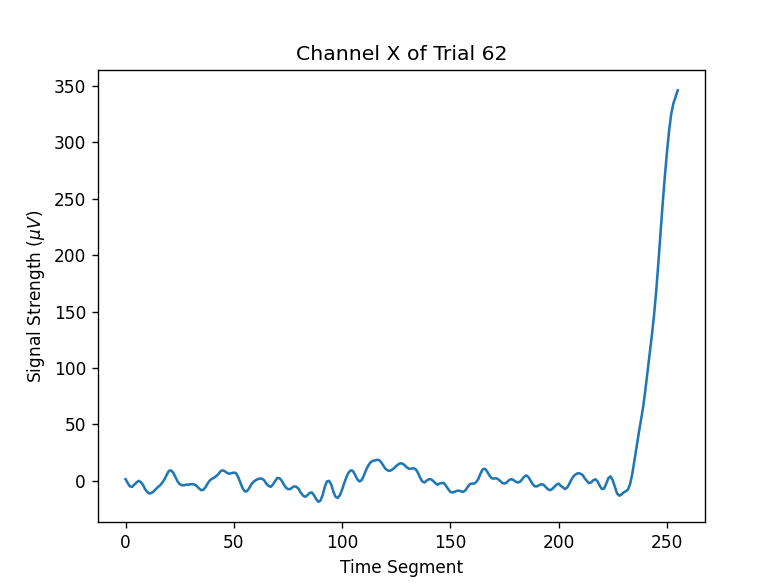

Text(0.5, 1.0, 'Channel X of Trial 62')

In [138]:
   

#   Loop through all the trials and find the global min & max values.
allmaxes = [xx.max().max() for xx in dfs.values()]
print(f'The global maximum is {max(allmaxes)}')

#2) Figure out which recording & channel contain this global max
maxloc = np.array(allmaxes).argmax()
print(f"Maximum was seen in trial {maxloc}")
maxtrial = list(dfs.values())[maxloc] 

print("Channels sorted by Max value")
print(maxtrial.max().sort_values(ascending=False))


# Make a time vs. voltage visualization of the channel X across all trials
plt.figure()
plt.plot(maxtrial.X)
plt.xlabel('Time Segment')
plt.ylabel('Signal Strength ($\mu V$)')
plt.title(f"Channel X of Trial {maxloc}")




In [ ]:
##################################################################################################################
#
# PI Question #1:  That's a weirdly big spike at the end.  How common is that??
#
#  You Do: Provide a useful answer which addresses the PI's question which includes a meaningful numerical metric
#          and a visualization.



<IPython.core.display.Javascript object>


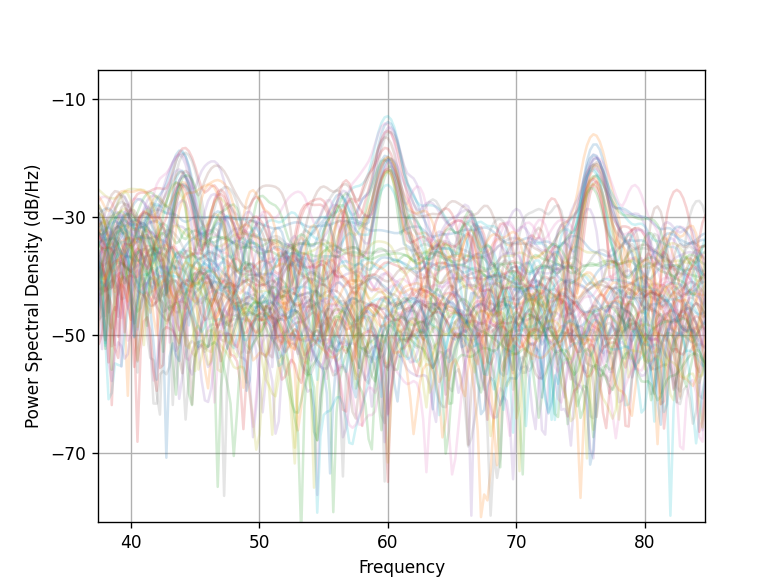

In [151]:
# Plot spectrograms for all C1 channel recordings
plt.figure()

psds=[]
for cc in list(dfs.values())[0:]:
    Pxx, f =plt.psd(cc.C1, Fs=256, NFFT=2**10, alpha=0.2)
    psds.append(Pxx)

In [152]:
##################################################################################################################
#
# PI Question #2:  What's up with those spikey things in the middle--near 60 frequency?  Is that in all the
#                  channels?
#
#
#  You Do: Provide a useful answer which addresses the PI's questions which includes a meaningful numerical metric
#          and a visualization.


76

In [153]:
##################################################################################################################
# Stretch Question:
#
# Are the "end swoop" from Q1 and the "spikeys" in Q2 related?